# Time Series

In [1]:
# display graphs in this notebook
%matplotlib inline

In [2]:
# load statistics library
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# this is not mandatory, but makes graphs look better
import seaborn as sns
sns.set_style('ticks')
sns.set_context('notebook',font_scale=1.5)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Load Data

In [4]:
# load in GDP data and index by date
df = pd.read_csv('data/GDPC1.csv').rename(columns={'DATE':'date','VALUE':'GDP'})
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Basic Plotting

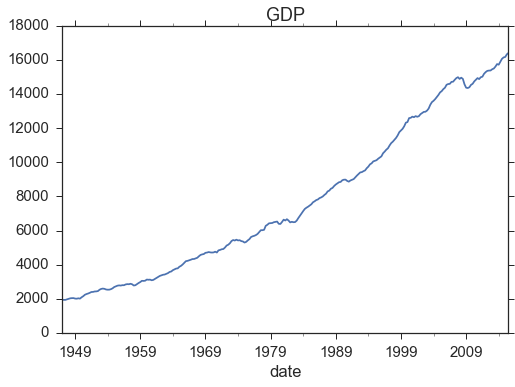

In [5]:
df['GDP'].plot(title='GDP')

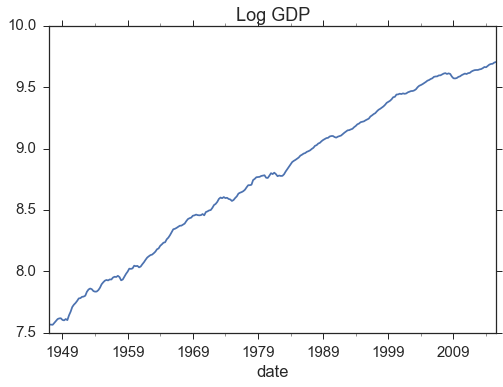

In [6]:
df['lGDP'] = np.log(df['GDP'])
df['lGDP'].plot(title='Log GDP')

# Growth Rate

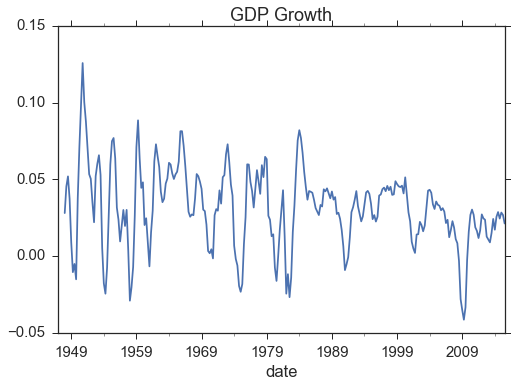

In [7]:
df['growth'] = df['lGDP'].diff(4) # annualized
df['growth'].plot(title='GDP Growth')

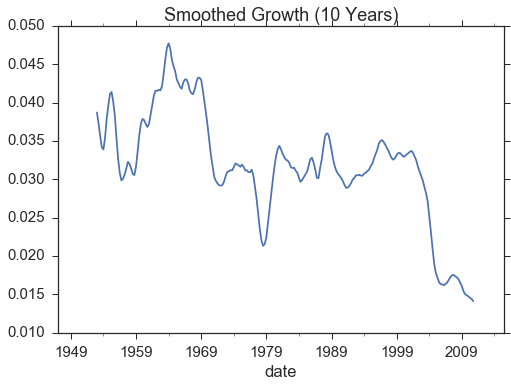

In [8]:
pd.rolling_mean(df['growth'],window=40,center=True).plot(title='Smoothed Growth (10 Years)')

# Volatility

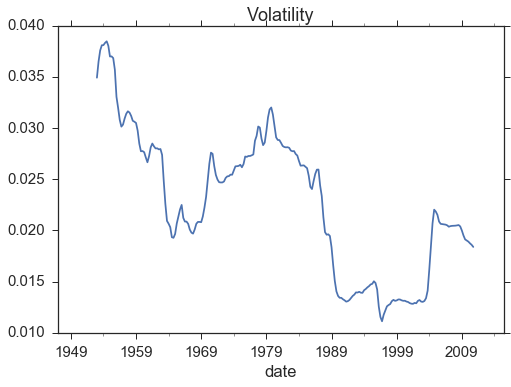

In [9]:
df['vol'] = pd.rolling_std(df['growth'],window=40,center=True)
df['vol'].plot(title='Volatility');

In [10]:
df['growth'].std()/df['growth'].mean()

0.8159113190988454

# Persistence

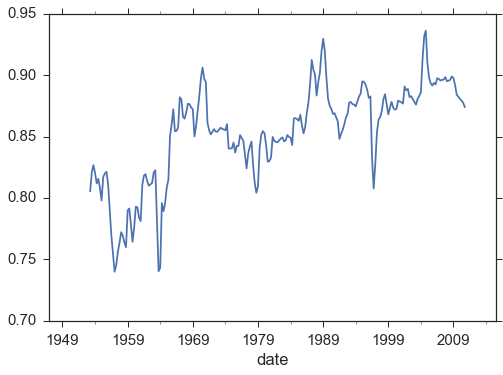

In [11]:
pd.rolling_corr(df['growth'],df['growth'].shift(),window=40,center=True).plot();